PROJECTSTATEMENT: BANK LOAN APPROVAL PREDICTION

TYPE: BINARY CLASSIFICATION

In this project we will use classification algorithms to predict wether the based on the data given like INCOME,LOAN AMOUNT, CREDIT SCORE a loan can be approved or not.


IMPORTING THE NECCESSARY LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  #visualisation
import seaborn as sb             #visualisation
from sklearn.model_selection import train_test_split  #to split the given dataset into train and test dataset
from sklearn.preprocessing import LabelEncoder, StandardScaler  #LabelEncoder to convert the catergorical data into integer form and StandardScaler for scaling the data
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler #for balancing the dataset

DATA COLLECTION AND PROCCESSING

In [ ]:
# loading the dataset to pandas DataFrame
loan_dataset = pd.read_csv('/content/loan_dataset.csv')

printing the loan_dataset

In [ ]:
loan_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
#printing the type of dataset
type(loan_dataset)

pandas.core.frame.DataFrame

In [ ]:
#printing the first 10 rows of the loan_dataset
loan_dataset.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [ ]:
#finding the rows and columns of the loan_dataset i.e shape
loan_dataset.shape

(614, 13)

there are 614 rows and 13 columns were each columns represent a features or attribute

Now we'll find the datatypes of each columns

By doing this we can identify the columns with categorical data type and  convert the categorical data into integer type to train our model

In [ ]:
loan_dataset.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


To get values like the mean, count and min of the column we can use describe() method.

In [ ]:
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


write here the observaton made on the each feature

PERFORMING EDA ON THE LOAN_DATASET TO GET MORE INSIGHTS ON OUR DATASET

In [ ]:
# Dependent column values
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,345
1,102
2,101
3+,51


In [ ]:
#since the 3+ value can not be treated as integer we'll replace 3+ with 4 using replace() function
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [ ]:
# again printing Dependent column values
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,345
1,102
2,101
4,51


finding the null values in the dataset and replacing it with the median for numerical value and mode for categorical values

In [ ]:
# number of missing values in each column
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


as we can see the there are -

13 missing values in Gender column

15 missing values in Dependents column

32 missing values in Self_employed column

22 missing values in LoanAmount column

14 missing values in Loan_Amount_Term column

50 missing values in Credit_History column

In [ ]:
#replacing the null values with median in integer columns
integer_features = ['LoanAmount','Loan_Amount_Term','Credit_History','CoapplicantIncome']
for feature in integer_features:
    loan_dataset[feature].fillna(loan_dataset[feature].median(),inplace=True)


#replacing the null values with MODE in categorical columns
categorical_features = ['Gender','Married','Dependents','Self_Employed']
for features in categorical_features:
    loan_dataset[features].fillna(loan_dataset[features].mode()[0],inplace=True)


<ipython-input-87-d051472b03ff>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_dataset[feature].fillna(loan_dataset[feature].median(),inplace=True)
<ipython-input-87-d051472b03ff>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

In [ ]:
loan_dataset.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,4,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [ ]:
#now again using isnull() function to see if there is any null value left
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


NOW SINCE ALL THE MISSING VALUES ARE HANDLED NOW WE'LL PLOT EACH FEATURES WITH LOAN STATUS TO TO DISCOVER WHICH PARAMETERS ARE DIRECTLY OR INDIRECTLY PROPORTIONAL TO LOAN APPROVAL

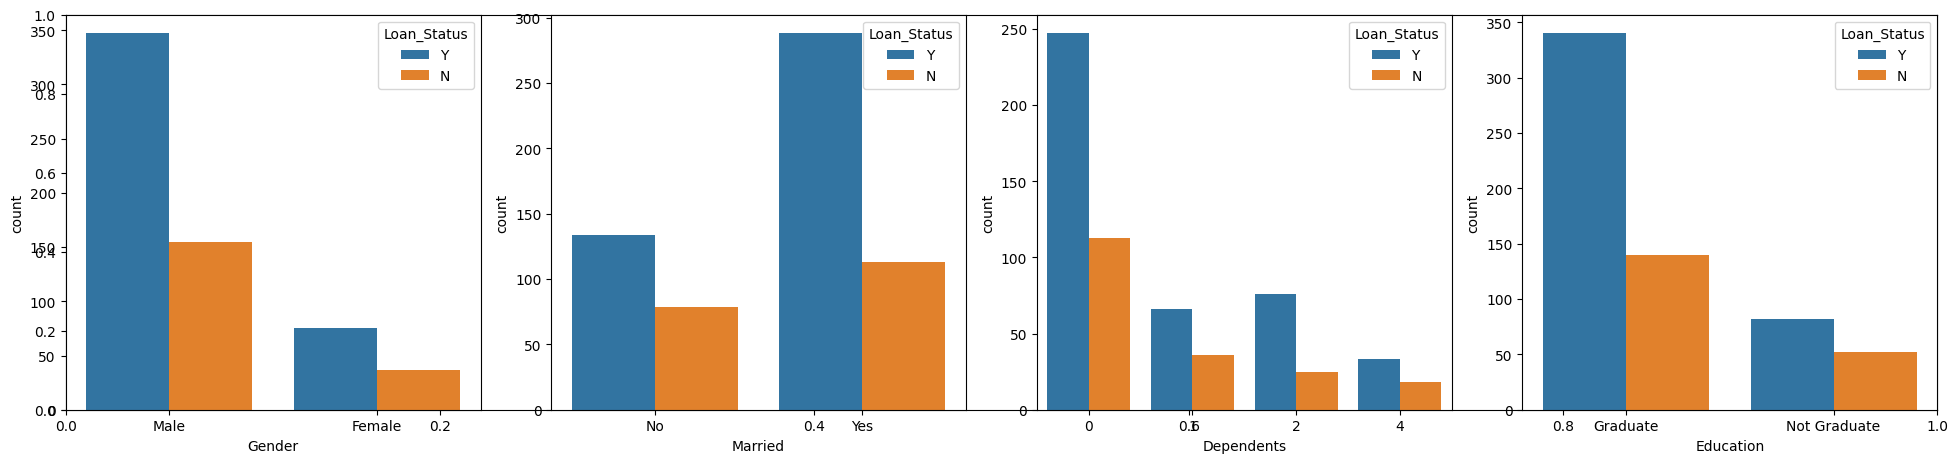

In [ ]:
plt.subplots(figsize=(20, 5))
for i, col in enumerate(['Gender', 'Married', 'Dependents', 'Education']):
    plt.subplot(1, 4, i+1)
    sb.countplot(data=loan_dataset, x=col, hue='Loan_Status')
plt.tight_layout()
plt.show()

ABOVE GRAPHS CONCLUSION-

* FROM THE ABOVE WE CAN SAY THAT THE EDUCATION QUALIFICATION IS DIRECTLY PROPORTIONAL TO LOAN APPROVAL AND CHANCES TO GETTING YOUR LOAN APPROVE IS HIGH AS COMPARED TO NON-GRADUATE

* FROM THE ABOVE WE CAN SAY THAT THE THE LOAN APPROVAL RATE FOR THE MARRIED CUSTOMER IS HIGH

*  FROM THE ABPVE WE CAN SAY THAT THE LOAN APPROVAL RATE FOR MALE GENDER IS HIGH COMPARED TO FEMALE

*  ALSO, FROM ABOVE WE CAN SAY THAT THE LOAN APPROVAL IS INVERSELY PROPORTIONAL TO NUMBER OF DEPENDENTS






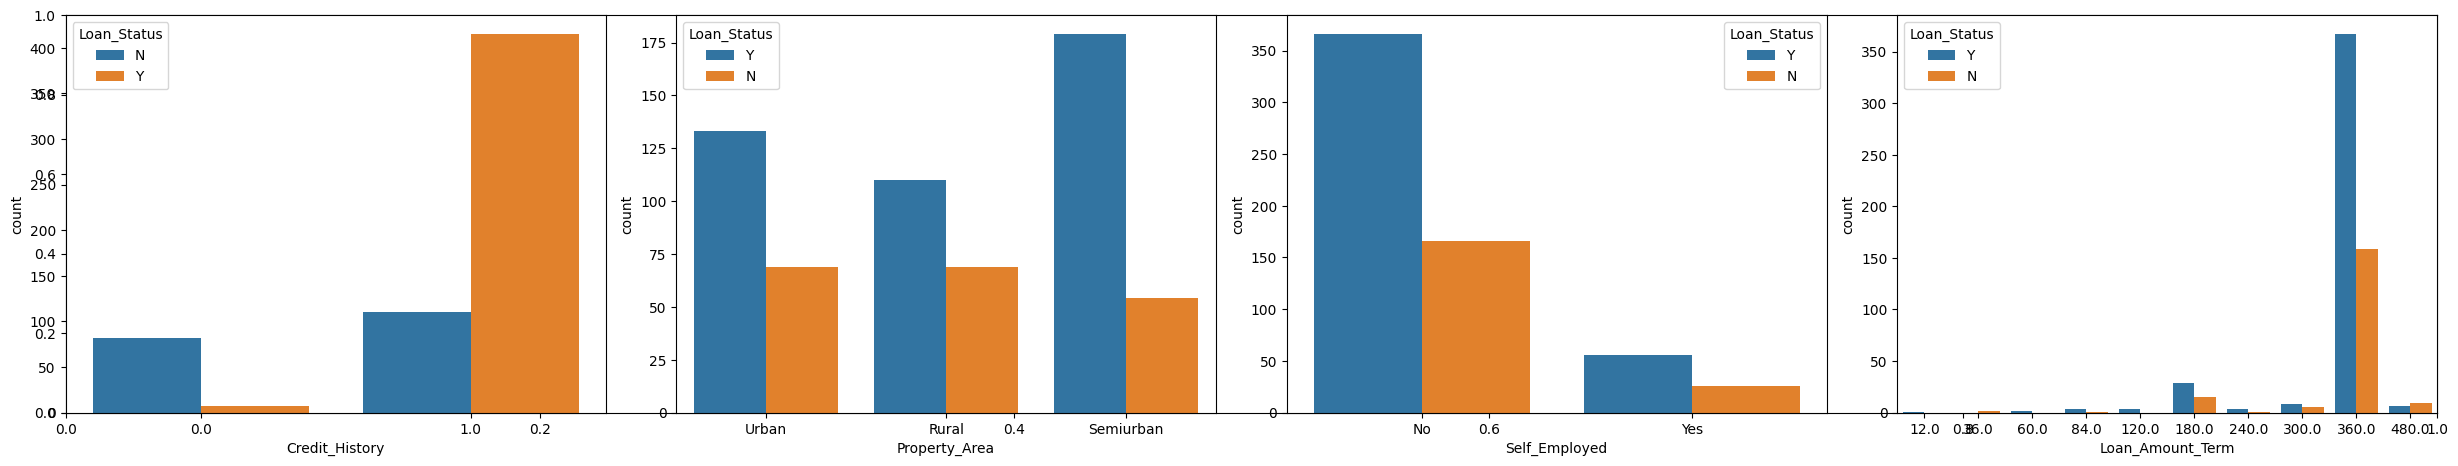

In [ ]:
plt.subplots(figsize=(25, 5))
for i, col in enumerate(['Credit_History','Property_Area','Self_Employed','Loan_Amount_Term']):
    plt.subplot(1, 4, i+1)
    sb.countplot(data=loan_dataset, x=col, hue='Loan_Status')
plt.tight_layout()
plt.show()

In [ ]:
#Let’s see the mean amount of the loan granted to males as well as females. For that, we will use groupyby() method.
loan_dataset.groupby('Gender').mean(numeric_only=True)['LoanAmount']

,LoanAmount
Gender,
Female,126.732143
Male,149.996016


THE LOAN APPLICATION BY MALE ARE MORE COMPARED TO FEMALE

In [ ]:
#Let’s see the mean amount of the loan granted to males as well as females based on their marriage . For that, we will use groupyby() method.
loan_dataset.groupby(['Married','Gender']).mean(numeric_only=True)['LoanAmount']

Married  Gender
No       Female    116.412500
         Male      136.338346
Yes      Female    152.531250
         Male      154.918699
Name: LoanAmount, dtype: float64

THE LOAN APPLICATION BY MALE ARE MORE IF THEY ARE MARRIED COMPARED TO FEMALE

In [ ]:
loan_dataset.groupby(['Gender','Married']).mean(numeric_only=True)['LoanAmount']

Gender  Married
Female  No         116.412500
        Yes        152.531250
Male    No         136.338346
        Yes        154.918699
Name: LoanAmount, dtype: float64

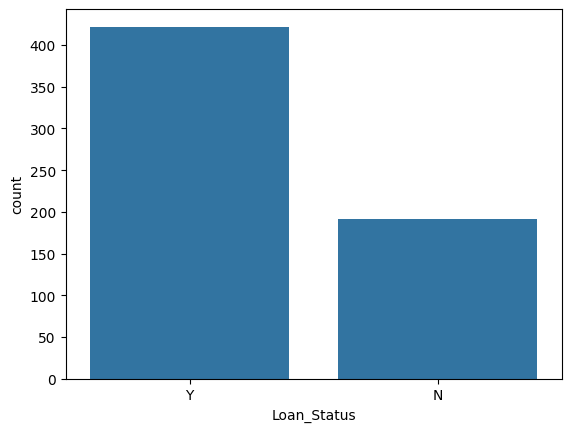

In [ ]:
# Distribution of target variable
sb.countplot(x='Loan_Status', data=loan_dataset)
plt.show()

PLOTTING PIE CHART OF THE GIVEN DATASET TO UNDERSTAND WHETHER THE DATASET IS BALANCED OR NOT




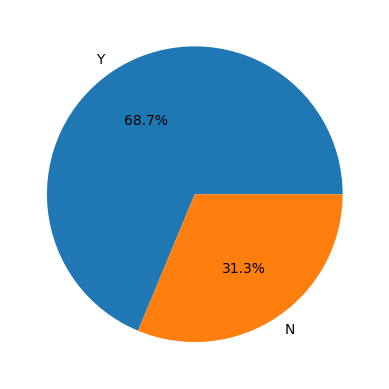

In [ ]:
temp = loan_dataset['Loan_Status'].value_counts()
plt.pie(temp.values,
        labels=temp.index,
        autopct='%1.1f%%')
plt.show()

THE ABOVE THE CHART SHOWS THAT THE DATASET IS NOT BALANCED HENCE WE WILL BALANCE THE DATA FOR OPTIMUM MODEL PERFORMANCE

In [ ]:
# now since LOAN_ID has no meaning or no contribution so we can drop that colomn by using drop() function
new_loan_dataset = loan_dataset.drop(['Loan_ID'],axis=1)
new_loan_dataset

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,4,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


NOW WE'LL CONVERT THE CATERGORICAL DATA COLUMN TO INTERGER TYPE AS WE KNOW THAT THE MACHINE LEARNING ALGORITHM UNDERSTANDS ONLY THE INTEGER VALUES AND NOT CATEGORICAL VALUE

FOR GENDER: MALE=1, FEMALE=0

FOR MARRIED: YES=1, NO =0

FOR SELF_EMPLOYEED: YES=1, NO =0

FOR PROPERTY_AREA: RURAL=0, SEMIURBAN=1, URBAN=2

FOR EDUCATION: GRADUATE=1, NOT GRADUATE =0

FOR LOAN_STATUS: Y=1, N =0

In [ ]:
label_encoder = LabelEncoder()
categorical_columns = ['Gender', 'Married', 'Education', 'Self_Employed',  'Property_Area', 'Loan_Status']

for column in categorical_columns:
    new_loan_dataset[column] = label_encoder.fit_transform(new_loan_dataset[column])

new_loan_dataset.replace({"Education":{0: 1,1 :0}},inplace=True)

Now to confirm that all the colomns are converted into integer type run the following code

In [ ]:
new_loan_dataset.dtypes

,0
Gender,int64
Married,int64
Dependents,object
Education,int64
Self_Employed,int64
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64
Credit_History,float64


since no categorical coloumn is present we have successfully converted all coloumns into int ofo float type as it is needed to plot the heat map

NOW BASED ON THE GIVEN DATASET LET'S CREATE HEAT MAP AND CONCLUDE OUR UNDERSTANDING FROM IT

HEAT MAP S ALSO KNOWN AS CORRELATION MAP USE TO FIND THE DIRECT AND INDIRECT RELATION BETWEEN ATTRIBUTES/FEATURES

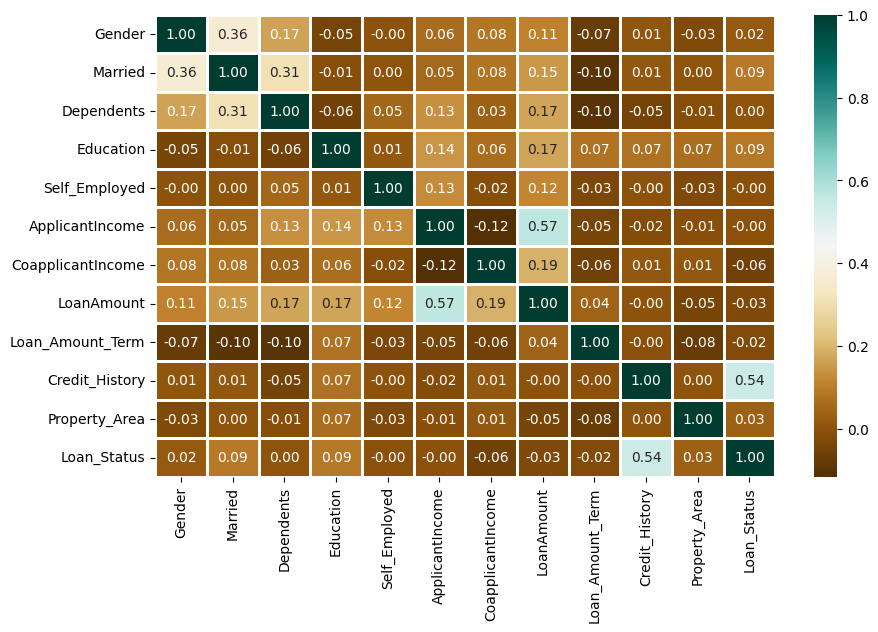

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sb.heatmap(new_loan_dataset.corr(),cmap='BrBG' ,annot=True, fmt='.2f', linewidths=1,cbar=True)
plt.show()

BASED ON THE ABOVE HEAT MAP WE CAN SAY THAT-

1. APPLICANT INCOME IS DIRECTLY PROPRTIONAL TO LOAN AMOUNT

2. IF YOUR CREDIT HISTORY IS GOOD THEN LOAN APPROVAL CHANCES  IS HIGH  

In [ ]:
#creating a new feature called Income to Loan Ration
new_loan_dataset['Income_to_Loan_Ratio'] = new_loan_dataset['ApplicantIncome'] / (new_loan_dataset['LoanAmount'] + 1)
new_loan_dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_to_Loan_Ratio
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,1,45.341085
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,35.527132
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1,44.776119
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1,21.347107
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1,42.253521


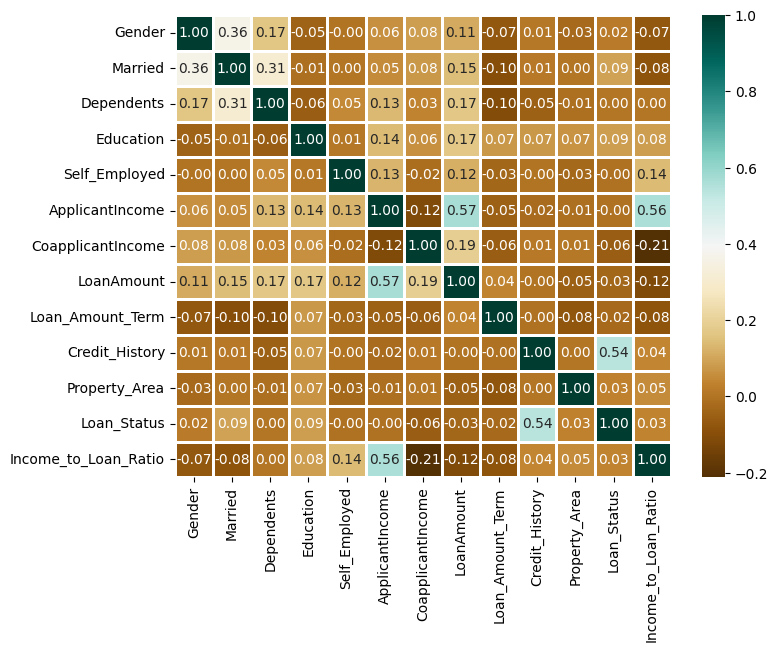

In [ ]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sb.heatmap(new_loan_dataset.corr(),cmap='BrBG' ,annot=True, fmt='.2f', linewidths=1,cbar=True)
plt.show()

FROM ABOVE HEAT MAP WE CAN SAY THAT THE INCOME_TO_LOAN_RATIO HAS NO DIRECT CORRELATION WITH LOAN STATUS SO WE'LL REMOVE THAT FEATURE

In [ ]:
#new_loan_dataset.drop(['Income_to_Loan_Ratio'],axis=1)
new_loan_dataset.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_to_Loan_Ratio
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,1,45.341085
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,35.527132
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1,44.776119
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1,21.347107
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1,42.253521


DATA PREPROCESSING

In [ ]:
#feature selection
X = new_loan_dataset.drop('Loan_Status', axis=1)
y = new_loan_dataset['Loan_Status']
X.shape, y.shape

((614, 12), (614,))

In [ ]:
#normalising the features
scaler = StandardScaler()
X = scaler.fit_transform(X)


MODEL BUILDING OF SVM

In [ ]:
#splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((245, 12), (369, 12), (245,), (369,))

In [ ]:
# As the data was highly imbalanced we will balance
# it by adding repetitive rows of minority class.
ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
X, y = ros.fit_resample(X_train, y_train)

X_train.shape, X.shape , X_test.shape

((245, 12), (344, 12), (369, 12))

In [ ]:
#train the model using the training dataset
# Initialize SVM with default parameters
svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_train, y_train)


SVC(random_state=42)

MODEL EVALUATION

In [ ]:
#predict the target label of the test dataset
y_pred = svm_classifier.predict(X_test)

y_pred.shape

(369,)

In [ ]:
#to print 20 labels out of 123 of y_pred
y_pred[0:20]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
#to print 20 labels out of 123 of y_pred and for y_test
y_test[0:20]

,Loan_Status
350,1
377,1
163,1
609,1
132,1
578,1
316,1
2,1
340,0
77,0


now predicting the score and evaluating it in initial

In [ ]:
#score of training dataset
svm_classifier.score(X_train,y_train)

0.8285714285714286

the accuracy of training dataset is 82.85%

In [ ]:
#score of testing dataset
svm_classifier.score(X_test,y_test)

0.8157181571815718

the accuracy of testing dataset is 81.57%

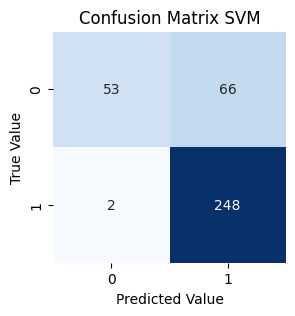

In [ ]:
#plotting the confusion matrix
cm = confusion_matrix(y_test, svm_classifier.predict(X_test))

# Plot the confusion matrix
plt.figure(figsize=(3, 3))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix SVM')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

In [ ]:
#calculating the accuracy,recall,precision and F1 score by using the score()method
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score,classification_report, confusion_matrix
print("The initial performance is:")
print("the accuracy is:", accuracy_score(y_test,y_pred))
print("the recall score is:", recall_score(y_test,y_pred))
print("the precision score is:", precision_score(y_test,y_pred))
print("the F1 score is:", f1_score(y_test,y_pred))

The initial performance is:
the accuracy is: 0.8157181571815718
the recall score is: 0.992
the precision score is: 0.7898089171974523
the F1 score is: 0.8794326241134752


  ploting the ROC and AUC using the **roc_curve** and **auc functions** from sklearn.metrics

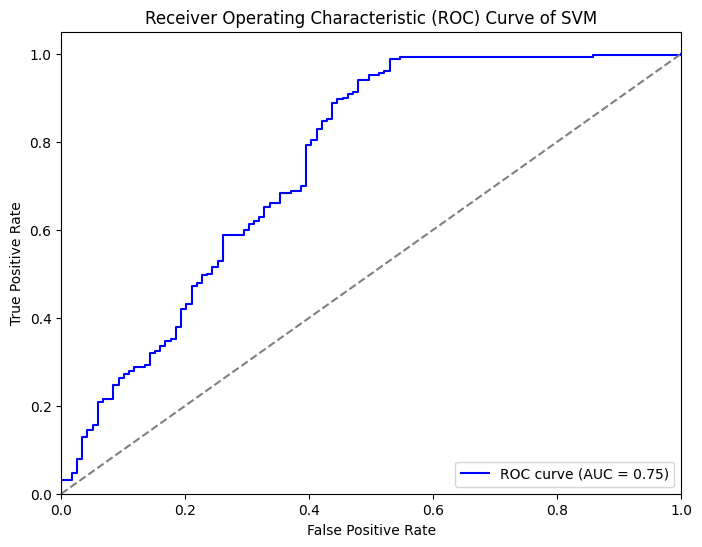

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Generate predicted probabilities for the positive class (class 1)
Y_pred_prob = svm_classifier.decision_function(X_test)  # For SVM, use decision_function

# Calculate FPR, TPR, and threshold values
fpr, tpr, thresholds = roc_curve(y_test, Y_pred_prob)

# Calculate AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (no skill)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of SVM')
plt.legend(loc="lower right")
plt.show()

#explanation
#roc_curve(y_test, Y_pred_prob): Calculates the FPR, TPR, and thresholds.
#auc(fpr, tpr): Computes the area under the ROC curve.
#Diagonal line ([0, 1], [0, 1]): Represents a model with no discrimination (AUC = 0.5).
#Key Points:
#AUC ranges from 0.5 (random performance) to 1 (perfect classifier).
#The closer the curve follows the top-left edge, the better the model’s performance.

Interpretation of the Model Performance
AUC Score of 0.75:

An AUC score of 0.75 indicates that the model performs moderately well in distinguishing between the approved and non-approved classes.

An AUC above 0.75 suggests that the model has some predictive capability but is not highly accurate or optimal.


This score suggests that the model is better than random guessing but still has room for improvement.
ROC Curve Shape:

The ROC curve’s shape shows a gradual rise, indicating that the model has an acceptable balance between sensitivity (True Positive Rate) and specificity (False Positive Rate) but could be further optimized to improve performance.

Conclusion

Moderate Performance: With an AUC of 0.75, the model is moderately effective, but it could benefit from improvements such as feature engineering, hyperparameter tuning, or trying other models (e.g., Random Forest, Gradient Boosting) for potentially better results.

Room for Improvement: This level of AUC might be acceptable for some applications but may need enhancement for critical financial applications like loan approvals, where accuracy is crucial.

Overall, while the model shows reasonable performance, further optimization could make it more reliable.

NOW USING THE **LOGISTIC REGRESSION MODEL** FOR THE DATASET AND THEN EVALUATING THE PERFORMANCE

In [ ]:
#importing the nessccesary modules
from sklearn.linear_model import LogisticRegression

In [ ]:
#since dataset is already split into traning and testing

#train the model using the training dataset

# Initialize LogisticRegression with default parametrs
logistic_classifier = LogisticRegression(penalty='l2', dual=False, tol=0.0001,
                                         C=1.0, fit_intercept=True, intercept_scaling=1,
                                         class_weight=None, random_state=None, solver='lbfgs', max_iter=100,
                                         multi_class='deprecated', verbose=0, warm_start=False, n_jobs=None,
                                         l1_ratio=None)

# Train the model
logistic_classifier.fit(X_train, y_train)

LogisticRegression()

**Model Evaluation**

In [ ]:
#now Assessing  the performance of the trained model
#Generating predictions on the test set.


y_pred1 = logistic_classifier.predict(X_test)

In [ ]:
#to print 20 labels out of 123 of y_pred1
y_pred1[0:20]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
#to print 20 labels out of 123 of y_pred and for y_test
y_test[0:20]

,Loan_Status
350,1
377,1
163,1
609,1
132,1
578,1
316,1
2,1
340,0
77,0


now predicting the score and evaluating it




In [ ]:
logistic_classifier.score(X_train,y_train)

0.8040816326530612

the accuracy of training data is 80.40%

In [ ]:
logistic_classifier.score(X_test,y_test)

0.8102981029810298

the accuracy of testing data is 81.03%

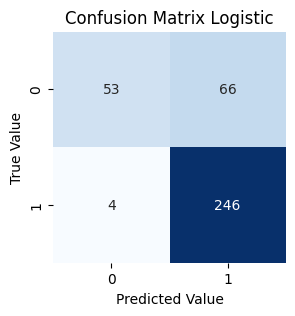

In [ ]:
#plotting the confusion matrix
cm1 = confusion_matrix(y_test, logistic_classifier.predict(X_test))

# Plot the confusion matrix
plt.figure(figsize=(3, 3))
sb.heatmap(cm1, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix Logistic')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

In [ ]:
#calculating the accuracy,recall,precision and F1 score by using the score()method
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score,classification_report, confusion_matrix
print("The initial performance is:")
print("the accuracy is:", accuracy_score(y_test,y_pred1))
print("the recall score is:", recall_score(y_test,y_pred1))
print("the precision score is:", precision_score(y_test,y_pred1))
print("the F1 score is:", f1_score(y_test,y_pred1))

The initial performance is:
the accuracy is: 0.8102981029810298
the recall score is: 0.984
the precision score is: 0.7884615384615384
the F1 score is: 0.8754448398576512


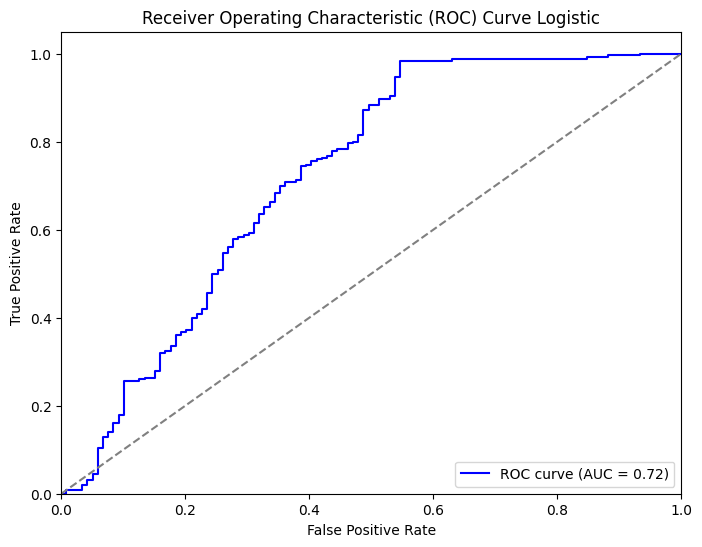

In [ ]:
#plotting AUC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Generate predicted probabilities for the positive class (class 1)
Y_pred_prob1 = logistic_classifier.predict_proba(X_test)[:, 1]  # Select only the second column# For SVM, use decision_function

# Calculate FPR, TPR, and threshold values
fpr, tpr, thresholds = roc_curve(y_test, Y_pred_prob1)

# Calculate AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (no skill)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Logistic')
plt.legend(loc="lower right")
plt.show()

the AUC is 0.72 meaning the accuracy and reliability is good

**DESCISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Define Features and Target
X = new_loan_dataset.drop('Loan_Status', axis=1)
y = new_loan_dataset['Loan_Status']

# List of Features
print(X.columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Income_to_Loan_Ratio'],
      dtype='object')


In [ ]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and Transform the Features
X_scaled = scaler.fit_transform(X)

# Convert Scaled Features back to DataFrame for easier handling
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Verify Scaling
print(X_scaled.head())

     Gender   Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0  0.472343 -1.372089   -0.682729   0.528362      -0.392601         0.072991   
1  0.472343  0.728816    0.142459   0.528362      -0.392601        -0.134412   
2  0.472343  0.728816   -0.682729   0.528362       2.547117        -0.393747   
3  0.472343  0.728816   -0.682729  -1.892641      -0.392601        -0.462062   
4  0.472343 -1.372089   -0.682729   0.528362      -0.392601         0.097728   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0          -0.554487   -0.211241          0.273231        0.411733   
1          -0.038732   -0.211241          0.273231        0.411733   
2          -0.554487   -0.948996          0.273231        0.411733   
3           0.251980   -0.306435          0.273231        0.411733   
4          -0.554487   -0.056551          0.273231        0.411733   

   Property_Area  Income_to_Loan_Ratio  
0       1.223298              0.187892  
1      -1.318513

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_scaled, y, test_size=0.99, random_state=42)
X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape

((6, 12), (608, 12), (6,), (608,))

In [ ]:
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2,
                                       min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                       max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

# Train the Model
dt_classifier.fit(X_train1, y_train1)


DecisionTreeClassifier()

In [ ]:
# Predict on Test Data
y_pred2 = dt_classifier.predict(X_test1)


In [ ]:
#testing data score
dt_classifier.score(X_test1,y_test1)

0.8075657894736842

In [ ]:
#training data score
dt_classifier.score(X_train1,y_train1)

1.0

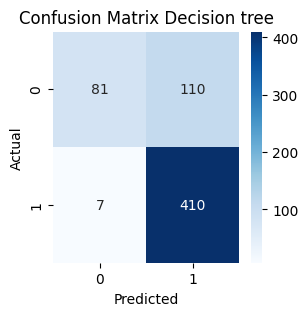

In [ ]:
cm3 = confusion_matrix(y_test1, y_pred2)

# Visualize Confusion Matrix
plt.figure(figsize=(3, 3))
sb.heatmap(cm3, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Decision tree')
plt.show()

In [ ]:
#calculating the accuracy,recall,precision and F1 score by using the score()method
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score,classification_report, confusion_matrix

print("The initial performance is:")
print("the accuracy is:", accuracy_score(y_test1,y_pred2))
print("the recall score is:", recall_score(y_test1,y_pred2))
print("the precision score is:", precision_score(y_test1,y_pred2))
print("the F1 score is:", f1_score(y_test1,y_pred2))

The initial performance is:
the accuracy is: 0.8075657894736842
the recall score is: 0.9832134292565947
the precision score is: 0.7884615384615384
the F1 score is: 0.8751334044823906


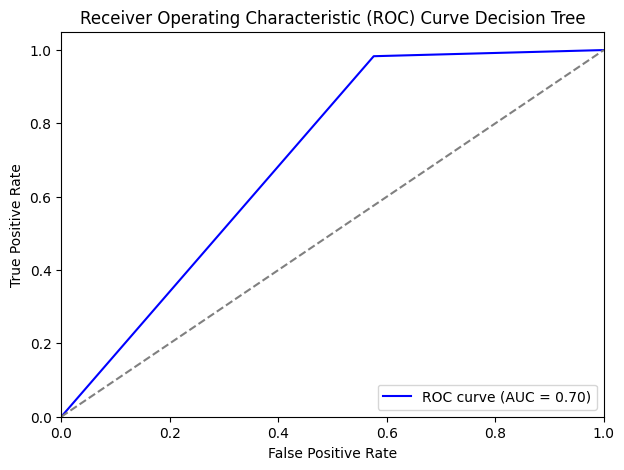

In [ ]:
#plotting AUC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Generate predicted probabilities for the positive class (class 1)
Y_pred_prob2 = dt_classifier.predict_proba(X_test1)[:, 1]  # Select only the second column as it needs only 1D array

# Calculate FPR, TPR, and threshold values
fpr, tpr, thresholds = roc_curve(y_test1, Y_pred_prob2)

# Calculate AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (no skill)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Decision Tree')
plt.legend(loc="lower right")
plt.show()

Interpretation:
AUC Score (0.70):

**The AUC score is a common measure of model performance. It ranges from 0 to 1, where:**

1.0 indicates a perfect model,

0.5 indicates a model that performs no better than random guessing,

Below 0.5 indicates a model performing worse than random guessing.

An AUC of 0.70 suggests that the model has a good, though not exceptional, ability to distinguish between approved and rejected loans.


True Positive Rate (Sensitivity) vs. False Positive Rate:

The ROC curve shows the trade-off between the true positive rate (sensitivity) and the false positive rate.

 A curve closer to the top-left corner indicates a better model.


Here, the curve does not hug the top-left corner closely, indicating some room for improvement in model performance.


**Interpretation of the Curve Shape:**


A moderate curve, like the one shown, suggests the model can capture most true positives while keeping false positives at a reasonable level but may struggle with some classification challenges.


This is typical when a model is trained on a somewhat challenging or noisy dataset, or when there’s room for additional tuning or feature engineering.
Conclusion:

The model's performance is decent, indicating a reasonably good classifier. However, it may not be fully optimized and could benefit from further improvement, such as feature selection, hyperparameter tuning, or possibly using a different model to achieve a higher AUC score.

In [ ]:
#NOW PRINTING THE ACCURACY SCORE OF ALL THREE ALGORITHMS
print(f'Accuracy of SVM: {accuracy_score(y_test, y_pred) * 100:.2f}%')

print(f' Accuracy of Logistic Regression: {accuracy_score(y_test, y_pred1) * 100:.2f}%')

print(f' Accuracy of DECISION TREE: {accuracy_score(y_test1, y_pred2) * 100:.2f}%')

Accuracy of SVM: 81.57%
 Accuracy of Logistic Regression: 81.03%
 Accuracy of DECISION TREE: 80.76%


In [ ]:
#since the accuracy of SVM and LogiticRegression is allmost same so comparing other parameters
print("of SVM")
print("the recall score is:", recall_score(y_test,y_pred))
print("the precision score is:", precision_score(y_test,y_pred))
print("the F1 score is:", f1_score(y_test,y_pred))

of SVM
the recall score is: 0.992
the precision score is: 0.7898089171974523
the F1 score is: 0.8794326241134752


In [ ]:
print("of LogisticRegression")
print("the recall score is:", recall_score(y_test,y_pred1))
print("the precision score is:", precision_score(y_test,y_pred1))
print("the F1 score is:", f1_score(y_test,y_pred1))

of LogisticRegression
the recall score is: 0.984
the precision score is: 0.7884615384615384
the F1 score is: 0.8754448398576512


Since the ROC score of SVM is 0.75 and slightly higher than ROC score of LogisticRegression 0.72 so we can say that the best model is SVM for the prediction problem


now performing the best hyperparameter tuning to find the best estimators and then evaluating the model

In [ ]:
#Hyperparameter Tuning-

#importing the GridSearchCV module from sklearn
from sklearn.model_selection import  GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1, 10],
    'kernel': ['rbf', 'linear', 'poly']
}
grid = GridSearchCV(SVC(random_state=42), param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
best_svm = grid.best_estimator_



Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale

In [ ]:
#Predictions with Best Estimator
y_pred_best = best_svm.predict(X_test)
print("Tuned Model Performance:")
print("the accuracy is:", accuracy_score(y_test,y_pred_best))
print("the recall score is:", recall_score(y_test,y_pred_best))
print("the precision score is:", precision_score(y_test,y_pred_best))
print("the F1 score is:", f1_score(y_test,y_pred_best))

Tuned Model Performance:
the accuracy is: 0.8130081300813008
the recall score is: 0.988
the precision score is: 0.7891373801916933
the F1 score is: 0.8774422735346359


In [ ]:
# 9. Example Prediction Function
def predict_loan(data_input):
    input_df = pd.DataFrame([data_input])
    input_scaled = scaler.transform(input_df)
    prediction = svm_classifier.predict(input_scaled)
    return 'Approved' if prediction[0] == 1 else 'Rejected'

# Example Usage
new_applicant = {
    'Gender': 0,                # 1: Male, 0: Female
    'Married': 1,               # 1: Yes, 0: No
    'Dependents': 4,            # Number of dependents
    'Education': 0,             # 1: Graduate, 0: Not Graduate
    'Self_Employed': 1,         # 1: Yes, 0: No
    'ApplicantIncome': 500,
    'CoapplicantIncome': 0,
    'LoanAmount': 2000,
    'Loan_Amount_Term': 360,
    'Credit_History': 0,        # 1: Good, 0: Bad
    'Property_Area': 2,         # 0: Urban, 1: Semiurban, 2: Rural
    'Income_to_Loan_Ratio': 500 / 2000  # Custom feature
}

print(predict_loan(new_applicant))

Approved
